In [27]:
#Importing pandas and loading our dataset
import pandas as pd
rides = pd.read_csv('capital-onebike.csv')

#Let's check the columns and their datatype 
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
Start date              290 non-null object
End date                290 non-null object
Start station number    290 non-null int64
Start station           290 non-null object
End station number      290 non-null int64
End station             290 non-null object
Bike number             290 non-null object
Member type             290 non-null object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB


###### It's obvious that the date cloumns are imported as strings. We will try to load our dataset in a differnet way.

In [28]:
#Let's load the dataset using parse_dates argument
rides = pd.read_csv('capital-onebike.csv', parse_dates = ['Start date', 'End date'])

rides.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
Start date              290 non-null datetime64[ns]
End date                290 non-null datetime64[ns]
Start station number    290 non-null int64
Start station           290 non-null object
End station number      290 non-null int64
End station             290 non-null object
Bike number             290 non-null object
Member type             290 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


###### Now, the date columns are imported correctly ('Start date', 'End date')

In [29]:
# Data Manpulation in date format
# Subtract the start date from the end date
rides['Duration_in_minutes'] = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration_in_seconds'] = rides['Duration_in_minutes'].dt.total_seconds()

rides.head(5)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration_in_minutes,Duration_in_seconds
0,2017-10-01 15:23:00,2017-10-01 15:26:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,00:03:00,180.0
1,2017-10-01 15:42:00,2017-10-01 17:49:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,02:07:00,7620.0
2,2017-10-02 06:37:00,2017-10-02 06:42:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,00:05:00,300.0
3,2017-10-02 08:56:00,2017-10-02 09:18:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,00:22:00,1320.0
4,2017-10-02 18:23:00,2017-10-02 18:45:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,00:22:00,1320.0


In [30]:
#We can answer some summary statistics questions on date columns

rides['Duration_in_minutes'].mean()

Timedelta('0 days 00:19:38.482758')

In [5]:
rides['Duration_in_minutes'].sum()

Timedelta('3 days 22:56:00')

###### What is the percentage of each Member type of the total usage ?

In [31]:
(rides['Member type'].value_counts()/len(rides))*100

Member    81.37931
Casual    18.62069
Name: Member type, dtype: float64

###### For each group in Member type what is the mean duration?

In [32]:
rides.groupby('Member type')['Duration_in_seconds'].mean()

Member type
Casual    1990.00000
Member     992.79661
Name: Duration_in_seconds, dtype: float64

###### For each month in the 'Start date' column. what is the mean duration of a trip?


In [33]:
# Average duration by month
rides.resample('M', on = 'Start date')['Duration_in_seconds'].mean()


Start date
2017-10-31    1882.222222
2017-11-30     855.145631
2017-12-31     637.974684
Freq: M, Name: Duration_in_seconds, dtype: float64

###### We can even dig deeper to the level of days

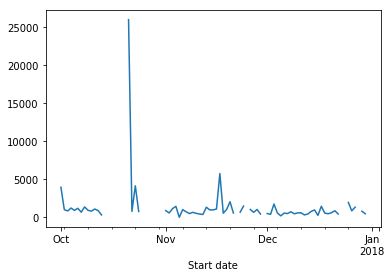

In [35]:
rides.resample('D', on = 'Start date')['Duration_in_seconds'].mean().plot()


###### Between Oct and Nov. We may have an outlier!

#### Joy Rides
###### There are some trips that have the same station for start and end station. These may be just for fun. We will find more about them

In [36]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds".format(rides['Duration_in_seconds'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds".format(rides[joyrides]['Duration_in_seconds'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2640.00 seconds


In [17]:
#Timezones in Pandas
rides['Duration_in_minutes'].dt.total_seconds().min()


-3300.0

###### Weird!, we must not have a trip in negative time. this may be because of:
- Not using the correct timezone
- Having an ambiguous date

In [37]:
# Try to set a timezone...
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')


In [38]:
# Subtract the start date from the end date
rides['Duration_in_minutes'] = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration_in_seconds'] = rides['Duration_in_minutes'].dt.total_seconds()

In [39]:
#Timezones in Pandas
rides['Duration_in_minutes'].dt.total_seconds().min()


120.00000000000001

###### Now we have solve the problem!

###### What about specifing the weekday for each ride!

In [41]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.weekday_name

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration_in_seconds'].median())

Ride start weekday
Friday       720.0
Monday       780.0
Saturday     480.0
Sunday       900.0
Thursday     660.0
Tuesday      630.0
Wednesday    600.0
Name: Duration_in_seconds, dtype: float64
